In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style(style="whitegrid")

In [2]:
xy = [(-3,+1),(-2,+1),(-1,-1),(0,+1),(1,-1),(2,+1),(3,+1)]
x = np.array(list(map(lambda fst: fst[0], xy)))
y = np.array(list(map(lambda fst: fst[1], xy)))

In [41]:
def phi(x):
    return (-8/3)*(x**2) + (2/3)*(x**4)
x_trans = np.array(list(map(phi, x)))

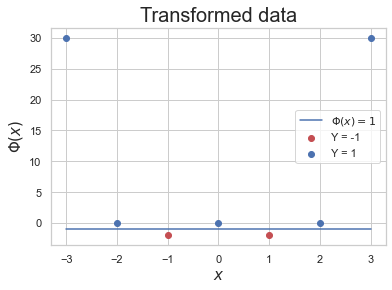

In [42]:
w = np.array([[1],[10]])
phi = np.array([x, x_trans])

np.dot(w.T, phi)

fig, ax = plt.subplots()
color_dict = {1:'b', -1: 'r'}
lab_dict = {1:"Y = 1", -1: "Y = -1"}
def swapfor(mapping, ls2):
    return [mapping[el2]for el2 in ls2]

for g in np.unique(y):
    i = np.where(y == g)
    ax.scatter(x[i], x_trans[i], c=color_dict[g], label=lab_dict[g])


linex = np.linspace(-3, 3, 100)
liney = np.ones(len(linex))*-1
ax.plot(linex, liney, label=r"$\Phi(x) = 1$");
ax.legend()
ax.set_ylabel(r'$\Phi(x)$', fontsize=15)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_title('Transformed data', fontsize=20)

plt.show()

In [6]:
# pics = np.load("data/images.npy", allow_pickle=False)
small_dataset = np.load("data/small_dataset.npy")
# small_labels = np.load("data/small_dataset_labels.npy").astype(int)
large_dataset = np.load("data/large_dataset.npy")
test_data = np.load("P2_Autograder_Data.npy")

In [128]:
large_dataset.shape

(5000, 784)

In [38]:
def disp(array):
    plt.figure()
    plt.imshow(array.reshape(28,28), cmap='Greys_r')
    plt.show()

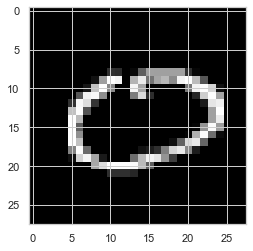

In [58]:
plt.figure()
plt.imshow(large_dataset[30].reshape(28,28), cmap='Greys_r')
plt.show()

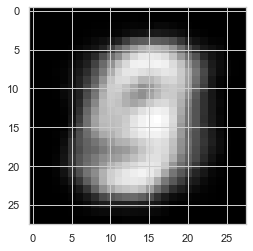

In [223]:
mu = cluster_mean(resp, X)
disp(mu[0])

In [233]:
def distance(p1, p2):
    # calulate the l2 distance between points, i.e. euclidean
    # each is a 1xD matrix
    return np.sqrt(sum(pow(p1-p2, 2)))

In [15]:
def make_one_hot(array):
    one_hot = np.zeros(array.shape)
    min_pos = np.array([np.argmin(row) for row in array])
    one_hot[np.arange(array.shape[0]), min_pos] = 1
    return one_hot 

def distance(p1, p2):
    # calulate the l2 distance between points, i.e. euclidean
    # each is a 1xD matrix
    return np.sqrt(sum(pow(p1-p2, 2)))

# initialisation of cluster asignment i.e. responsibility vectors
resp = make_one_hot(np.random.randn(X.shape[0], K))

# IMPROVEMENTS, use lin alg here

# 1 Find the cluster centers (cluster mean)
def cluster_mean(resp, data):
    # for each datapoint in cluster c,
    # sum it's vals and divide by number in class
    class_sums = np.zeros((resp.shape[1], data.shape[1]))
    for point, res in zip(data, resp):
        class_sums[np.argmax(res)] += point
    # count up the number of datapoints in each class    
    class_counts = np.sum(resp, axis=0)
    
    # class_mean = np.divide(class_sums, class_counts)
    class_mean = []
    for class_sum, class_count in zip(class_sums, class_counts):
        class_mean.append(np.divide(class_sum, class_count))
        
    class_mean = np.array(class_mean)
    return class_mean 

# IMPROVEMENTS, fix the one_hot shit

# 2 adjust reponsibility vectors
def adjust_resp(mu, data):
    # resp dims: NxC
    # mu dims:
    positions = []
    for point in data:
        distances = []
        for class_mean in mu:
            distances.append(distance(class_mean, point))
        one_ht = np.zeros(mu.shape[0])
        one_ht[np.argmin(distances)] = 1
        positions.append(one_ht)
        
    return np.array(positions)

# calculate the loss
def loss_func(data, mu, resp):
    loss_list = []
    # Loop through each datapoint in the dataset
    for datapoint, res in zip(data, resp):
        cluster = np.argmin(res)
        loss_list.append(distance(datapoint, mu[cluster]))
    return sum(loss_list)

In [17]:
resp = make_one_hot(np.random.randn(X.shape[0], K))
mu = cluster_mean(resp, X)
nw = adjust_resp(mu, X)

In [42]:
class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
    
    def __make_one_hot(self, array):
        one_hot = np.zeros(array.shape)
        min_pos = np.array([np.argmin(row) for row in array])
        one_hot[np.arange(array.shape[0]), min_pos] = 1
        return one_hot 

    def __distance(self, p1, p2):
        # calulate the l2 distance between points, i.e. euclidean
        # each is a 1xD matrix
        return sum(pow(p1-p2, 2))
       
    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        # 1 Find the cluster centers (cluster mean)
        def cluster_mean(resp, data):
            # for each datapoint in cluster c,
            # sum it's vals and divide by number in class
            class_sums = np.zeros((resp.shape[1], data.shape[1]))
            for point, res in zip(data, resp):
                class_sums[np.argmax(res)] += point
            # count up the number of datapoints in each class    
            class_counts = np.sum(resp, axis=0)
            
            # class_mean = np.divide(class_sums, class_counts)
            class_mean = []
            for class_sum, class_count in zip(class_sums, class_counts):
                class_mean.append(np.divide(class_sum, class_count))
                
            class_mean = np.array(class_mean)
            return class_mean 

        # 2 adjust reponsibility vectors
        def adjust_resp(mu, data):
            # resp dims: NxC
            # mu dims:
            positions = []
            for point in data:
                distances = []
                for class_mean in mu:
                    distances.append(self.__distance(class_mean, point))
                one_ht = np.zeros(mu.shape[0])
                one_ht[np.argmin(distances)] = 1
                positions.append(one_ht)
                
            return np.array(positions)

        # 3 calculate the loss
        def loss_func(data, mu, resp):
            loss_list = []
            # Loop through each datapoint in the dataset
            for datapoint, res in zip(data, resp):
                cluster = np.argmax(res)
                loss_list.append(self.__distance(datapoint, mu[cluster]))
            return sum(loss_list)

        # initialisation of cluster asignment i.e. responsibility vectors
        self.resp = self.__make_one_hot(np.random.randn(X.shape[0], self.K))
        # Set inital mu
        self.mu = np.random.randn(K, X.shape[1])
        self.loss_list = []

        # record the losses at each epoch
        converge = False
        epoch = 0
        while not converge:
            # 1 calc the mean of the clusters
            self.mu = cluster_mean(self.resp, X)
            
            # 2 Calc the loss
            current_loss = loss_func(X, self.mu, self.resp)

            # 3 adjust the responsibility vectors
            new_resp = adjust_resp(self.mu, X)
            if np.array_equal(new_resp, self.resp):
                converge = True
            self.resp = new_resp
            epoch += 1
            self.loss_list.append(current_loss)
            print("Epoch:", epoch)


    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        return self.mu

In [35]:
K = 10
KMeansClassifier = KMeans(K=10)
KMeansClassifier.fit(large_dataset)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39


KeyboardInterrupt: 

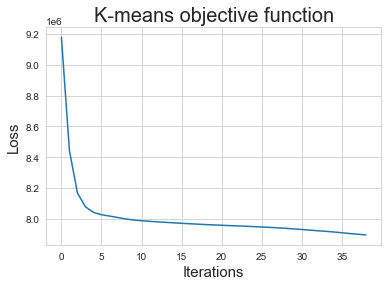

In [36]:
fig, ax = plt.subplots()
ax.plot(np.array(KMeansClassifier.loss_list));
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('Iterations', fontsize=15)
ax.set_title('K-means objective function', fontsize=20)
plt.show()

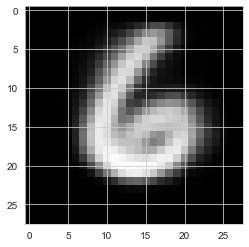

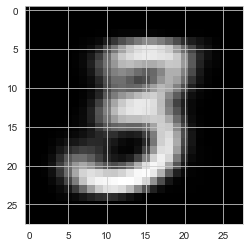

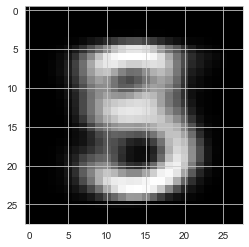

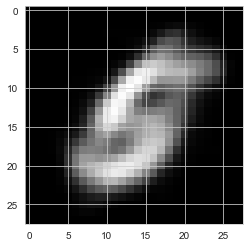

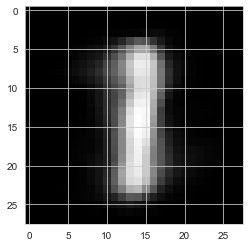

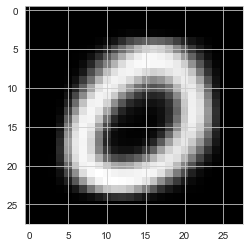

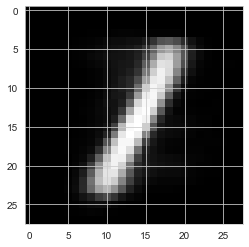

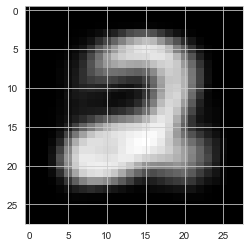

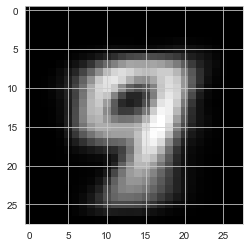

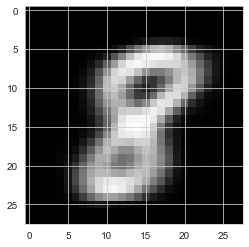

In [41]:
for cls in KMeansClassifier.mu:
    disp(cls)

## Starting at a random initialization and K = 10, plot the K-means objective function (the residual sum of squares) as a function of iterations and verify that it never increases.

In [ ]:
# Plot loss func over epoch